In [1]:
import numpy as np
import pandas as pd
from sklearn.impute import KNNImputer
import matplotlib.pyplot as plt

# Fase 1

## Análisis Descriptivo y Versionado Inicial de Datos

### Verificación de dimensiones y valores faltantes

In [2]:
df_unificado = pd.read_csv("data/dataset_unificado.csv")

In [3]:
df_unificado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1214 entries, 0 to 1213
Columns: 411 entries, dia to HORA
dtypes: float64(408), object(3)
memory usage: 3.8+ MB


In [4]:
df_unificado['Frio (Kw)__Consolidado EE'].describe()

count    1.213000e+03
mean     2.827299e+04
std      1.595166e+05
min      2.310000e+03
25%      1.799700e+04
50%      2.385900e+04
75%      2.936100e+04
max      5.572801e+06
Name: Frio (Kw)__Consolidado EE, dtype: float64

In [5]:
df_unificado.describe()

,Meta Aire Cocina__Consolidado KPI,Unnamed: 46__Consolidado KPI,Meta ET Servicios__Consolidado KPI,EE Agua / Hl__Consolidado KPI,Produccion Agua / Hl__Consolidado KPI,Meta Aire L4__Consolidado KPI,Unnamed: 113__Consolidado KPI,Meta Agua Elab__Consolidado KPI,Aire Envasado / Hl__Consolidado KPI,Meta ET Linea 2__Consolidado KPI,...,Tot L3. L4 y Planta de CO2__Totalizadores Glicol,"Tot L3, L4 y Planta de CO2__Totalizadores Glicol",Tot A40/240/50/60/Centec/Filtro__Totalizadores Glicol,Tot Reposo Superior__Totalizadores Glicol,Tot Trasiego__Totalizadores Glicol,Tot Reposo Inferior__Totalizadores Glicol,Id__Totalizadores Glicol,Tot Fermantacion_Cocina__Totalizadores Glicol,Tot A10/20__Totalizadores Glicol,Tot A130/330/430__Totalizadores Glicol
count,848.000000,0.0,848.000000,1213.000000,1213.000000,848.000000,0.0,848.000000,1213.000000,848.000000,...,365.000000,483.000000,848.000000,365.000000,1213.000000,365.000000,848.000000,365.000000,848.000000,848.000000
mean,0.506395,NaN,3.810211,0.077557,74.991907,0.607674,NaN,1.804939,1.970346,19.539544,...,1210.616638,3613.647205,2927.414222,135.747767,1504.849103,5664.484534,26763.672170,1382.553959,2091.933956,4839.680639
std,0.054483,NaN,0.490913,1.568732,10.255862,0.065380,NaN,0.119794,2.984420,2.517505,...,1002.485452,4970.894837,2211.123150,561.505628,8509.357600,2013.072701,11093.141109,1459.571360,2607.152525,2108.906700
min,0.435714,NaN,3.368182,-29.573295,20.465950,0.522857,NaN,1.568571,0.020958,17.272727,...,0.000000,3.750000,0.000000,0.000000,0.000000,170.630000,10049.000000,224.910000,0.000000,0.000000
25%,0.457143,NaN,3.486364,0.042578,70.362147,0.548571,NaN,1.725429,1.239613,17.878788,...,606.090000,473.025000,1257.260000,1.400000,673.910000,4410.960000,15239.750000,595.690000,0.000000,4155.915000
50%,0.492857,NaN,3.567909,0.063806,76.472625,0.591429,NaN,1.777714,1.596537,18.296970,...,1023.940000,1161.250000,2098.125000,3.300000,1282.310000,5633.530000,31477.125000,944.340000,0.000000,5067.510000
75%,0.557143,NaN,3.902955,0.090216,80.982418,0.668571,NaN,1.882286,2.063613,20.015152,...,1453.310000,5107.485000,4057.265000,12.010000,1689.120000,6959.130000,36770.250000,1515.620000,4874.767500,5984.172500
max,0.620714,NaN,4.963636,27.357143,180.017895,0.744857,NaN,2.180314,87.277857,25.454545,...,9275.440000,27378.380000,10498.000000,4054.270000,296218.410000,11066.500000,42000.000000,10870.690000,8110.880000,11039.500000


In [6]:
df_unificado.isna().sum().sort_values(ascending=False).head(119)

Unnamed: 84__Consolidado KPI                   1214
Unnamed: 103__Consolidado KPI                  1214
Unnamed: 66__Consolidado KPI                   1214
Hl Reserva 7__Totalizadores Produccion         1214
Unnamed: 123__Consolidado KPI                  1214
                                               ... 
Meta ET Linea 2__Consolidado KPI                366
Meta Agua Linea 4__Consolidado KPI              366
Meta Aire Cocina__Consolidado KPI               366
Id__Totalizadores Glicol                        366
Tot Vap Lav L3 / Hora__Consolidado GasVapor     366
Length: 119, dtype: int64

In [7]:
na_counts = df_unificado.isna().sum()
vars_300 = na_counts[na_counts >= 300].index.tolist()
df_unificado = df_unificado.drop(columns=vars_300, errors="ignore")

In [8]:
# Cuenta ceros
zero_counts = (df_unificado.eq(0) | df_unificado.eq("0")).sum(axis=0)
zero_ratio  = ((zero_counts / len(df_unificado)) * 100).sort_values(ascending=False)

umbral = 50.0
muchos_ceros = zero_ratio[zero_ratio >= umbral]

print("\nColumnas con ≥", umbral, "% ceros:", len(muchos_ceros), 'de', len(df_unificado.columns), "columnas totales")
print()
print(muchos_ceros.apply(lambda x: f"{x:.2f}%"))


Columnas con ≥ 50.0 % ceros: 26 de 260 columnas totales

Tot_Vapor_Caldera 3__Totalizadores Gas y Vapor             99.92%
Agua Filt FMaCist CE__Totalizadores Agua                   99.92%
Red Barriles__Totalizadores Agua                           99.92%
Rep Agua Cist CE__Totalizadores Agua                       99.92%
Fuel Oil Tk2 (Kg)__Totalizadores Gas y Vapor               99.92%
Fuel Oil Tk1 (Kg)__Totalizadores Gas y Vapor               99.92%
VAPOR DE CALDERA 1 KG__Totalizadores Gas y Vapor           99.92%
KW Linea 4__Totalizadores Energia                          99.92%
Kw llum/Serv L2__Totalizadores Energia                     99.92%
Totalizador Bba Gas__Totalizadores Efluentes               99.84%
Glicol Paste L3__Totalizadores Agua                        99.01%
TOT GAS ENTRADA PRINCIPAL M3__Totalizadores Gas y Vapor    98.19%
KW Atlas 3__Totalizadores Energia                          91.85%
FC Lavadora L2__Totalizadores Agua                         85.01%
FC Lavadora L2__Co

In [9]:
cols_muchos_ceros = muchos_ceros.index.tolist()
df_unificado = df_unificado.drop(columns=cols_muchos_ceros, errors="ignore")

### Detección de valores atípicos

Totales detectados por cada método:
    columna  outliers_IQR  outliers_Zmod
0   TOTAL         10846          15428

In [10]:
# --- 1) Máscara de outliers por IQR, columna a columna ---
def iqr_mask(col, k=1.5):
    s = col.dropna()
    if s.empty:
        return pd.Series(False, index=col.index)
    q1, q3 = s.quantile(0.25), s.quantile(0.75)
    iqr = q3 - q1
    if iqr == 0:
        return pd.Series(False, index=col.index)
    low, high = q1 - k*iqr, q3 + k*iqr
    return (col < low) | (col > high)

num_cols = df_unificado.select_dtypes(include=[np.number]).columns

mask_df = pd.DataFrame(False, index=df_unificado.index, columns=df_unificado.columns)
for c in num_cols:
    mask_df[c] = iqr_mask(df_unificado[c])

# --- 2) Tabla con las celdas outliers: fila, columna, valor ---
pos = mask_df[num_cols].stack()
pos = pos[pos]  # solo True
outliers_tabla = pd.DataFrame({
    "fila":   [i for i, _ in pos.index],
    "columna":[c for _, c in pos.index],
    "valor":  [df_unificado.loc[i, c] for i, c in pos.index],
})

# --- 3) Crear df con outliers -> NaN ---
df_nan = df_unificado.copy()
df_nan[num_cols] = df_nan[num_cols].mask(mask_df[num_cols])

# --- 4) Imputación ---
imp = KNNImputer(n_neighbors=5, weights="distance")

num = df_nan.select_dtypes(include='number')              # solo numéricas
imp_vals = imp.fit_transform(num)                         # → numpy array

df_imp_num = pd.DataFrame(imp_vals, index=num.index, columns=num.columns)

# reconstruyo el dataframe completo (no numéricas se mantienen)
df_imputado = df_nan.copy()
df_imputado[num.columns] = df_imp_num

# (Opcional) ver cuántos NaN imputaste
print("\nCantidad de valores imputados:", int(mask_df[num_cols].sum().sum()))


Cantidad de valores imputados: 10455


In [11]:
df_imputado['Frio'] = df_imputado['Frio (Kw)__Consolidado EE'].shift(-1)
df_imputado = df_imputado.iloc[1:-1].reset_index(drop=True)
df_imputado = df_imputado.drop(columns=['Frio (Kw)__Consolidado EE'])

C:\Users\out6let\AppData\Local\Temp\ipykernel_11104\3105066649.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_imputado['Frio'] = df_imputado['Frio (Kw)__Consolidado EE'].shift(-1)


In [12]:
from tools import checksum
checksum(df_imputado, 'df_imputado')

'Checksum calculado y guardado: 27f26036a958f5c9c692759dd1e74149'

c:\Users\out6let\miniconda3\envs\cervecera_env\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
c:\Users\out6let\miniconda3\envs\cervecera_env\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
C:\Users\out6let\AppData\Local\Temp\ipykernel_11104\361838458.py:42: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


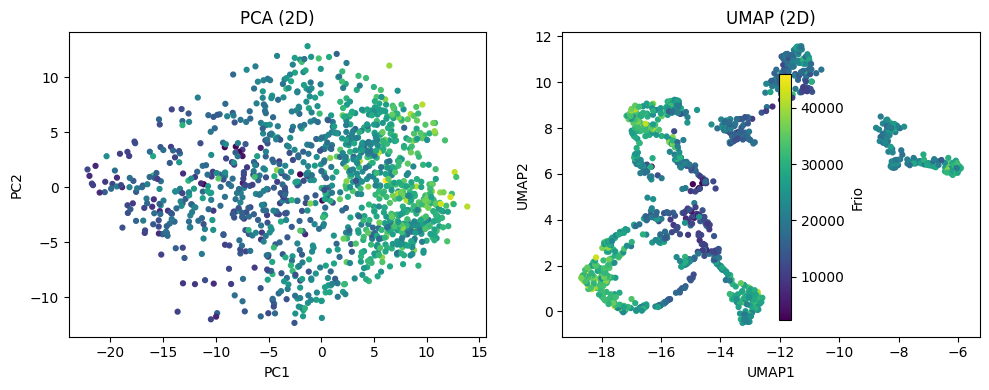

       pca1      pca2      umap1     umap2     Frio
0  0.296141 -2.490442 -13.545238  0.545769  23954.0
1  0.367053 -2.547915 -13.529552  0.560622  28268.0
2  2.650132 -4.190343 -13.496807  0.602280  24246.0
3  8.640257 -5.232570 -12.778254  0.615323  29885.0
4  5.178467 -4.302397 -12.928827  0.878030  24449.0


In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from umap import UMAP

# --- separar features numéricas y target ---
y = df_imputado['Frio'].to_numpy()
X = df_imputado.drop(columns=['Frio']).select_dtypes(include='number')

# por si quedó algún NaN
X = X.replace([np.inf, -np.inf], np.nan).fillna(X.median(numeric_only=True))

# --- escalar ---
Xs = StandardScaler().fit_transform(X)

# --- PCA 2D ---
pca_2d = PCA(n_components=2, random_state=0).fit_transform(Xs)

# --- UMAP 2D (parámetros básicos y estables) ---
umap_2d = UMAP(n_components=2, n_neighbors=15, min_dist=0.1, random_state=0).fit_transform(Xs)

# --- DataFrame con embeddings y target (opcional para guardar/analizar) ---
embeds = pd.DataFrame({
    'pca1': pca_2d[:,0], 'pca2': pca_2d[:,1],
    'umap1': umap_2d[:,0], 'umap2': umap_2d[:,1],
    'Frio': y
})

# --- plots simples ---
fig, axes = plt.subplots(1, 2, figsize=(10,4))
sc1 = axes[0].scatter(embeds['pca1'], embeds['pca2'], c=embeds['Frio'], s=12)
axes[0].set_title('PCA (2D)'); axes[0].set_xlabel('PC1'); axes[0].set_ylabel('PC2')

sc2 = axes[1].scatter(embeds['umap1'], embeds['umap2'], c=embeds['Frio'], s=12)
axes[1].set_title('UMAP (2D)'); axes[1].set_xlabel('UMAP1'); axes[1].set_ylabel('UMAP2')

cbar = fig.colorbar(sc2, ax=axes.ravel().tolist(), shrink=0.8)
cbar.set_label('Frio')

plt.tight_layout()
plt.show()

# Si querés ver las primeras filas:
print(embeds.head())

##  Análisis Temporal

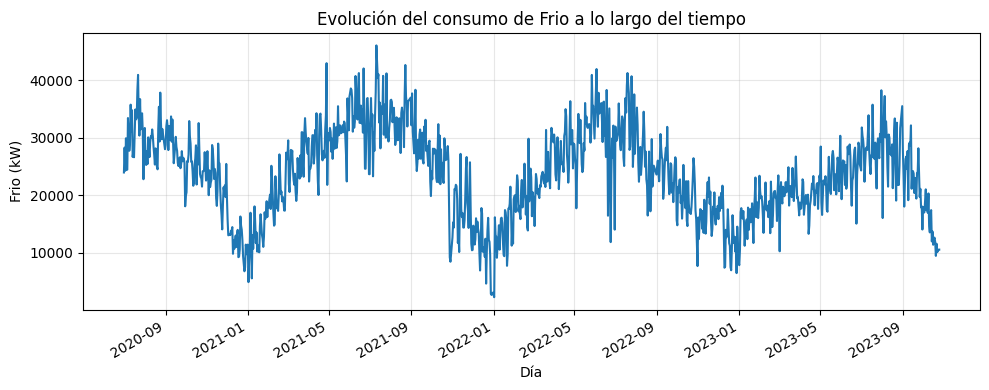

In [14]:
# Copia y limpieza básica
evol = df_imputado.copy()

# Asegurar fecha válida (formato día/mes/año) y quedarnos con fecha sola
evol["dia"] = pd.to_datetime(evol["dia"], format="%Y-%m-%d", dayfirst=True, errors="coerce").dt.date

# Quitar filas problemáticas y ordenar
evol = evol.dropna(subset=["dia", "Frio"]).sort_values("dia")

# Si hay varias filas por día, tomar el total diario (máximo/último)
evol_dia = evol.groupby("dia", as_index=False)["Frio"].max()

# Graficar
plt.figure(figsize=(10,4))
plt.plot(evol_dia["dia"], evol_dia["Frio"])
plt.xlabel("Día"); plt.ylabel("Frio (kW)")
plt.title("Evolución del consumo de Frio a lo largo del tiempo")
plt.grid(True, alpha=0.3)
plt.gcf().autofmt_xdate()
plt.tight_layout()
plt.show()

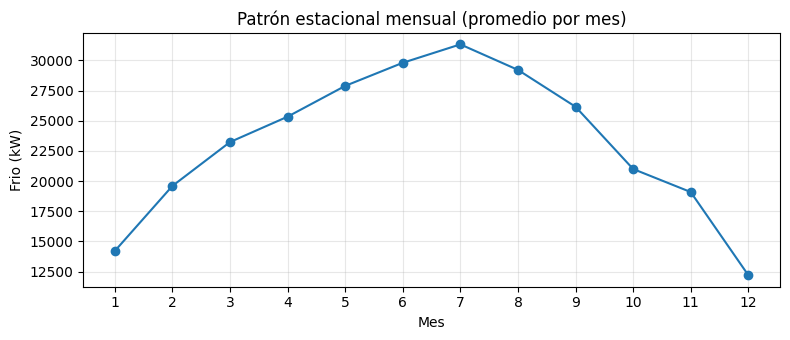

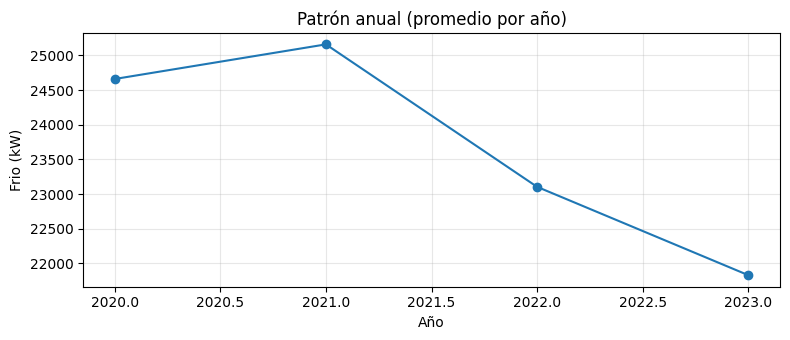

In [15]:
# --- preparar datos ---
g = df_imputado.copy()
g["dia"] = pd.to_datetime(g["dia"], format="%Y-%m-%d", errors="coerce")
g = g.dropna(subset=["dia", "Frio"]).sort_values("dia")
g["año"] = g["dia"].dt.year
g["mes"] = g["dia"].dt.month

# --- estacionalidad mensual (promedio por mes, agregando todas las años) ---
mensual = g.groupby("mes")["Frio"].mean()

plt.figure(figsize=(8,3.5))
plt.plot(mensual.index, mensual.values, marker="o")
plt.xticks(range(1,13))
plt.xlabel("Mes"); plt.ylabel("Frio (kW)")
plt.title("Patrón estacional mensual (promedio por mes)")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# --- patrón anual (promedio por año) ---
anual = g.groupby("año")["Frio"].mean()

plt.figure(figsize=(8,3.5))
plt.plot(anual.index, anual.values, marker="o")
plt.xlabel("Año"); plt.ylabel("Frio (kW)")
plt.title("Patrón anual (promedio por año)")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

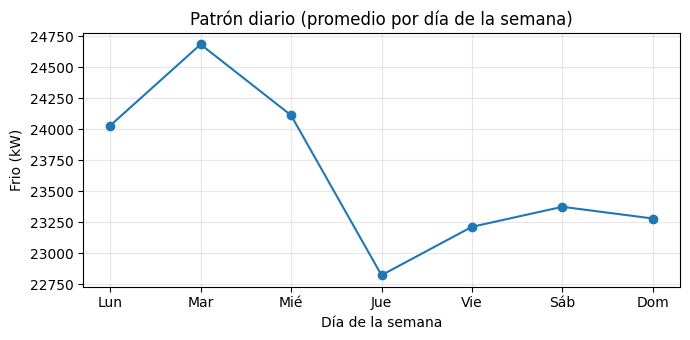

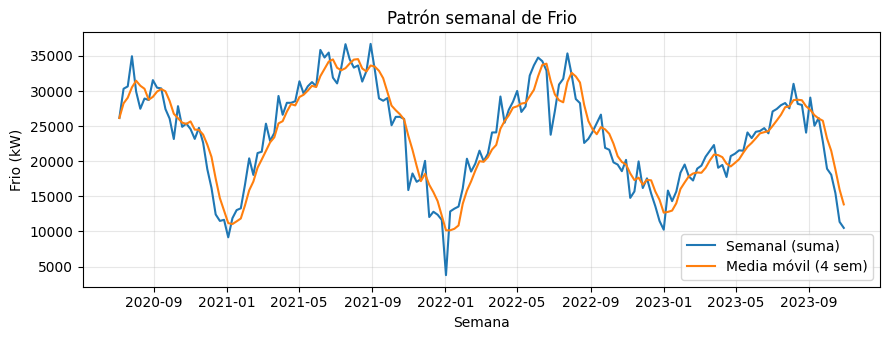

In [16]:
g = df_imputado.copy()
g["dia"] = pd.to_datetime(g["dia"], format="%Y-%m-%d", errors="coerce")
g = g.dropna(subset=["dia", "Frio"]).sort_values("dia")

# -----------------------
# Patrón DIARIO (por día de la semana)
# -----------------------
nombres_dow = {0:"Lun", 1:"Mar", 2:"Mié", 3:"Jue", 4:"Vie", 5:"Sáb", 6:"Dom"}
g["dow"] = g["dia"].dt.dayofweek
diario = g.groupby("dow")["Frio"].mean().reindex(range(7))

plt.figure(figsize=(7,3.5))
plt.plot([nombres_dow[d] for d in diario.index], diario.values, marker="o")
plt.xlabel("Día de la semana"); plt.ylabel("Frio (kW)")
plt.title("Patrón diario (promedio por día de la semana)")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# (opcional rápido: variabilidad por día de la semana)
# g.boxplot(column="Frio", by="dow", figsize=(8,4))
# plt.suptitle(""); plt.title("Distribución de Frio por día de la semana")
# plt.xlabel("Día de la semana (0=Lun..6=Dom)"); plt.ylabel("Frio (kW)")
# plt.tight_layout(); plt.show()

# -----------------------
# Patrón SEMANAL
# -----------------------
# Reindexar por fecha para resamplear
g = g.set_index("dia")

# Consumo semanal (suma por semana) + media móvil para suavizar
semanal = g["Frio"].resample("W").mean()
suavizada = semanal.rolling(4, min_periods=1).mean()  # ~promedio de 4 semanas

plt.figure(figsize=(9,3.5))
plt.plot(semanal.index, semanal.values, label="Semanal (suma)")
plt.plot(suavizada.index, suavizada.values, label="Media móvil (4 sem)")
plt.xlabel("Semana"); plt.ylabel("Frio (kW)")
plt.title("Patrón semanal de Frio")
plt.legend(); plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [17]:
g = df_imputado.copy()
g["dia"] = pd.to_datetime(g["dia"], format="%Y-%m-%d", errors="coerce")
g = g.dropna(subset=["dia","Frio"]).sort_values("dia")

# Día de la semana (0=Lun..6=Dom)
g["dow"] = g["dia"].dt.dayofweek

pearson = g["dow"].corr(g["Frio"])
print("Pearson(dow, Frio):", round(float(pearson), 4))

Pearson(dow, Frio): -0.054


In [18]:
# preparar datos
g = df_imputado.copy()
g["dia"] = pd.to_datetime(g["dia"], format="%Y-%m-%d", errors="coerce")
g = g.dropna(subset=["dia", "Frio"])
g["dow"] = g["dia"].dt.dayofweek  # 0=Lun..6=Dom
nombres = {0:"Lun",1:"Mar",2:"Mié",3:"Jue",4:"Vie",5:"Sáb",6:"Dom"}

# eta² (ANOVA)
y = g["Frio"].values
y_mean = y.mean()
ss_total = ((y - y_mean)**2).sum()

ss_between = 0.0
for d in range(7):
    yi = g.loc[g["dow"]==d, "Frio"].values
    if len(yi) == 0: 
        continue
    ss_between += len(yi) * (yi.mean() - y_mean)**2

eta2 = ss_between / ss_total if ss_total > 0 else np.nan
print("Eta²(día_semana → Frio):", round(float(eta2), 4))

# resumen por día para interpretar
print("\nPromedio por día:")
print(g.groupby("dow")["Frio"].mean().rename(index=nombres).round(2))

Eta²(día_semana → Frio): 0.0062

Promedio por día:
dow
Lun    24029.77
Mar    24684.83
Mié    24113.20
Jue    22824.03
Vie    23213.98
Sáb    23375.22
Dom    23280.83
Name: Frio, dtype: float64


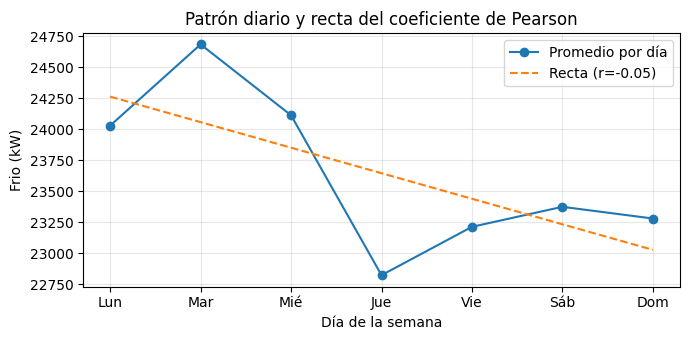

In [19]:
import numpy as np
import matplotlib.pyplot as plt

# Serie de promedios por día (ya la tenés como 'diario')
x = diario.index.values.astype(float)       # 0..6
y = diario.values

# Ajuste lineal y Pearson (r) con datos diarios crudos
m, b = np.polyfit(x, y, 1)
r = g["dow"].corr(g["Frio"])  # correlación Pearson día-de-semana vs Frio (datos diarios)

# Plot con recta
plt.figure(figsize=(7,3.5))
plt.plot(x, y, marker="o", label="Promedio por día")
plt.plot(x, m*x + b, linestyle="--", label=f"Recta (r={r:.2f})")
plt.xticks(x, [nombres_dow[int(d)] for d in x])
plt.xlabel("Día de la semana"); plt.ylabel("Frio (kW)")
plt.title("Patrón diario y recta del coeficiente de Pearson")
plt.grid(True, alpha=0.3); plt.legend()
plt.tight_layout()
plt.show()

## Análisis de Correlaciones

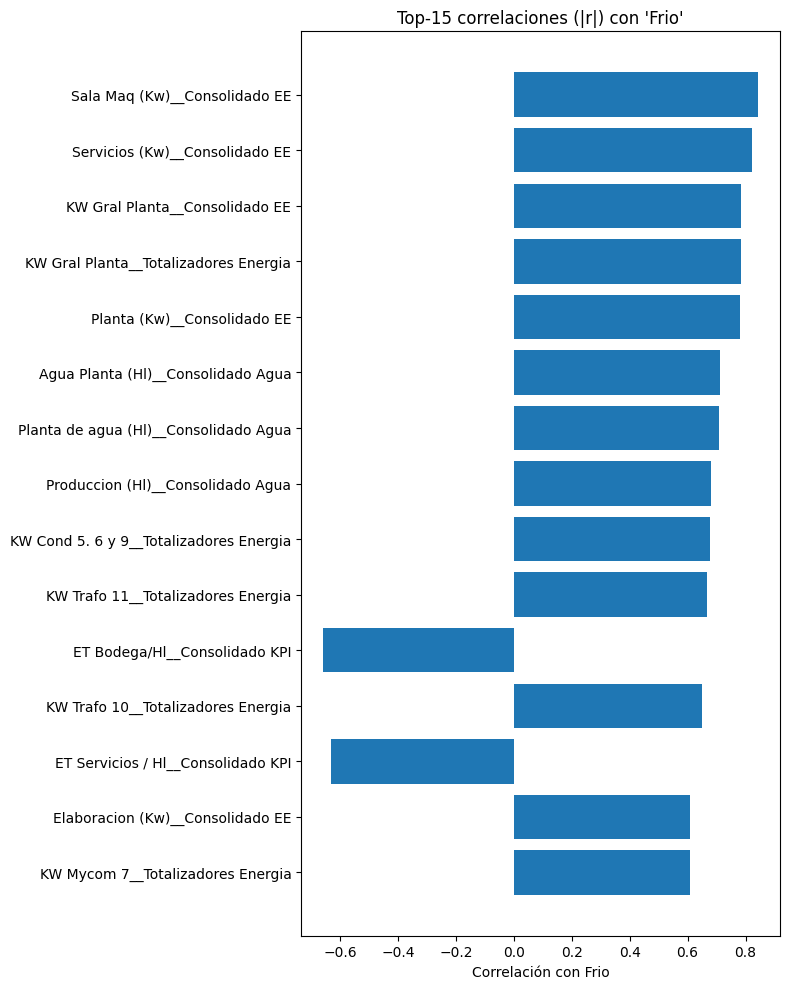

In [20]:
# (opcional) si tenés seaborn, activá este bloque para mejor visualización
try:
    import seaborn as sns
    HAS_SNS = True
except Exception:
    HAS_SNS = False

# --- preparar numéricas ---
g = df_imputado.copy()
num = g.select_dtypes(include=["number"])  # solo columnas numéricas
corr = num.corr(method="pearson")

# ---------------------------
# 1) Top-30 correlaciones con 'Frio'
# ---------------------------
if "Frio" in corr.columns:
    cor_frio = corr["Frio"].drop("Frio").sort_values(key=np.abs, ascending=False).head(15)

    plt.figure(figsize=(8, 10))
    plt.barh(cor_frio.index[::-1], cor_frio.values[::-1])
    plt.xlabel("Correlación con Frio")
    plt.title("Top-15 correlaciones (|r|) con 'Frio'")
    plt.tight_layout()
    plt.show()
else:
    print("⚠ No se encontró la columna 'Frio' entre las numéricas.")

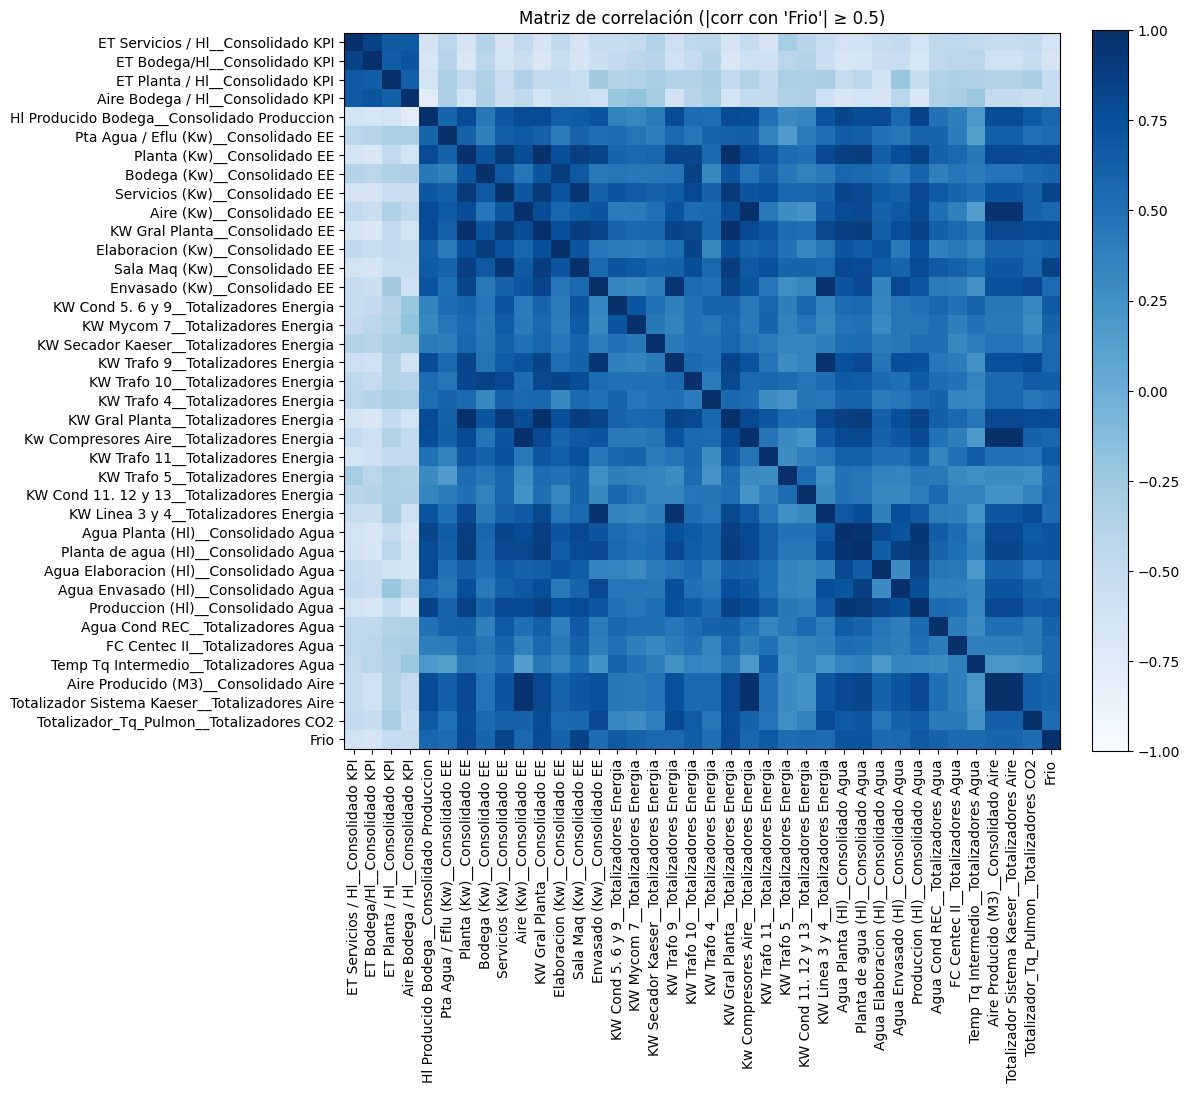

In [21]:
# --- parámetro: umbral de correlación absoluta con 'Frio' ---
UMBRAL = 0.50  # cambiá este valor

# --- preparar numéricas ---
g = df_imputado.copy()
num = g.select_dtypes(include="number").copy()

# seguridad: descartar columnas constantes (std=0) que rompen la correlación
const_cols = num.columns[num.std(numeric_only=True) == 0]
num = num.drop(columns=const_cols, errors="ignore")

# correlaciones absolutas
corr_abs = num.corr(method="pearson").abs()

if "Frio" not in corr_abs.columns:
    raise ValueError("No se encontró la columna numérica 'Frio' para filtrar por umbral.")

# columnas cuyo |corr con Frio| >= UMBRAL (incluye a 'Frio')
cols = corr_abs.index[corr_abs["Frio"] >= UMBRAL].tolist()

if len(cols) < 2:
    print(f"No hay suficientes variables con |corr| >= {UMBRAL}.")
else:
    subcorr = num[cols].corr(method="pearson")

    # --- plot legible ---
    n = len(cols)
    fig_w = min(12, 0.4 * n + 3)  # tamaño dinámico
    fig_h = min(12, 0.4 * n + 3)

    plt.figure(figsize=(fig_w, fig_h))
    im = plt.imshow(subcorr.values, vmin=-1, vmax=1, cmap="Blues")
    plt.colorbar(im, fraction=0.046, pad=0.04)
    plt.xticks(range(n), cols, rotation=90)
    plt.yticks(range(n), cols)
    plt.title(f"Matriz de correlación (|corr con 'Frio'| ≥ {UMBRAL})")
    plt.tight_layout()
    plt.show()

In [22]:
# --- 0) Preparar predictores numéricos (sin el target) ---
target = "Frio"
X = df_imputado.select_dtypes("number").drop(columns=[target], errors="ignore").copy()

# quitar columnas constantes o casi constantes (evita VIF infinito)
const_cols = [c for c in X.columns if X[c].nunique(dropna=True) <= 1]
X = X.drop(columns=const_cols)

# opcional: reemplazar inf y dropear filas totalmente NA
X = X.replace([np.inf, -np.inf], np.nan)

# --- 1) Correlación entre predictores ---
corr_pred = X.corr()

# Pares de predictores con |corr| alta (e.g., > 0.9)
thr = 0.90
mask = np.triu(np.ones_like(corr_pred, dtype=bool), k=1)
corr_pairs = (
    corr_pred.where(mask)
    .stack()
    .rename("corr")
    .reindex(corr_pred.columns, level=0)
    .reindex(corr_pred.columns, level=1)
    .reset_index()
    .rename(columns={"level_0": "feat_1", "level_1": "feat_2"})
)
altos = corr_pairs[np.abs(corr_pairs["corr"]) >= thr].sort_values(by="corr", key=np.abs, ascending=False)

print("=== Columnas constantes eliminadas ===")
print(const_cols)
print("\n=== Pares de predictores con |corr| >= {:.2f} ===".format(thr))
print(altos.head(50))  # muestra los 50 más fuertes



=== Columnas constantes eliminadas ===
[]

=== Pares de predictores con |corr| >= 0.90 ===
                                              feat_1  \
280            Produccion Agua / Hl__Consolidado KPI   
14186                 KW Gral Planta__Consolidado EE   
21326                 Red Paste L4__Consolidado Agua   
21430                  Red L1 y L2__Consolidado Agua   
21827                       Red L3__Consolidado Agua   
22117                  FC Barriles__Consolidado Agua   
22587                   FC L1 y L2__Consolidado Agua   
25146  VAPOR DE LINEA 1 Y 2 KG__Consolidado GasVapor   
25303      VAPOR DE LINEA 4 KG__Consolidado GasVapor   
25437      Vapor Servicio (Kg)__Consolidado GasVapor   
25448      Vapor Servicio (Kg)__Consolidado GasVapor   
25494     Tot_Vapor_CIP_Bodega__Consolidado GasVapor   
25541          Tot_Vapor_L3_L4__Consolidado GasVapor   
26081      Totalizador_Aire_Bodega__Consolidado Aire   
26167          Totalizador_Aire_L3__Consolidado Aire   
26198        

## Visualizaciones Requeridas

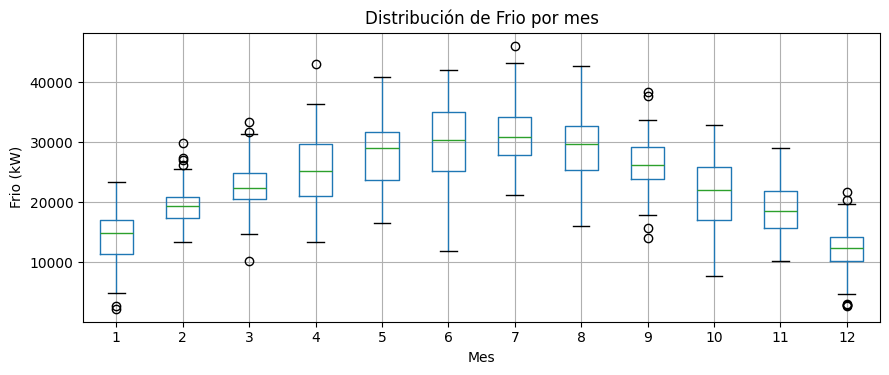

In [23]:
# --- preparar datos ---
g = df_imputado.copy()
g["dia"] = pd.to_datetime(g["dia"], format="%Y-%m-%d", errors="coerce")
g = g.dropna(subset=["dia", "Frio"]).sort_values("dia")
g["año"] = g["dia"].dt.year
g["mes"] = g["dia"].dt.month

g.boxplot(column="Frio", by="mes", figsize=(9,4))
plt.suptitle(""); plt.title("Distribución de Frio por mes"); plt.xlabel("Mes"); plt.ylabel("Frio (kW)")
plt.tight_layout()
plt.show()

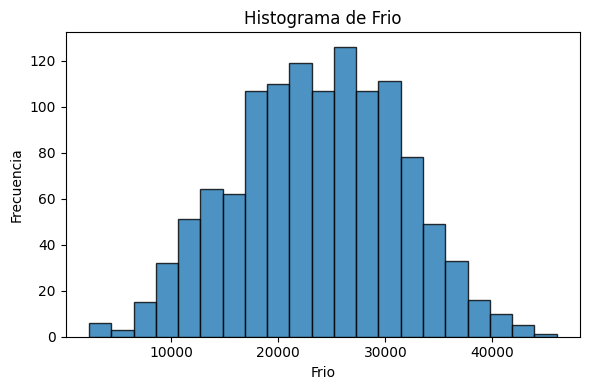

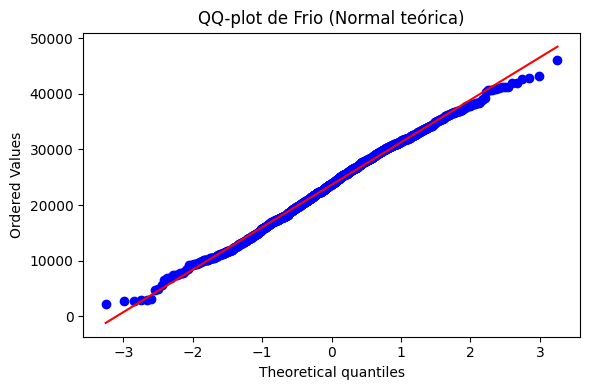

In [24]:
from scipy import stats

# --- Serie limpia ---
s = df_imputado["Frio"].replace([np.inf, -np.inf], np.nan).dropna()

# --- Histograma ---
plt.figure(figsize=(6,4))
plt.hist(s, bins="auto", edgecolor="k", alpha=0.8)
plt.xlabel("Frio")
plt.ylabel("Frecuencia")
plt.title("Histograma de Frio")
plt.tight_layout()
plt.show()

# --- QQ-plot (vs Normal) ---
plt.figure(figsize=(6,4))
stats.probplot(s, dist="norm", plot=plt)
plt.title("QQ-plot de Frio (Normal teórica)")
plt.tight_layout()
plt.show()

Top 6 por |corr| con 'Frio':
Sala Maq (Kw)__Consolidado EE            0.843818
Servicios (Kw)__Consolidado EE           0.823005
KW Gral Planta__Consolidado EE           0.785143
KW Gral Planta__Totalizadores Energia    0.785143
Planta (Kw)__Consolidado EE              0.782223
Agua Planta (Hl)__Consolidado Agua       0.713551
dtype: float64


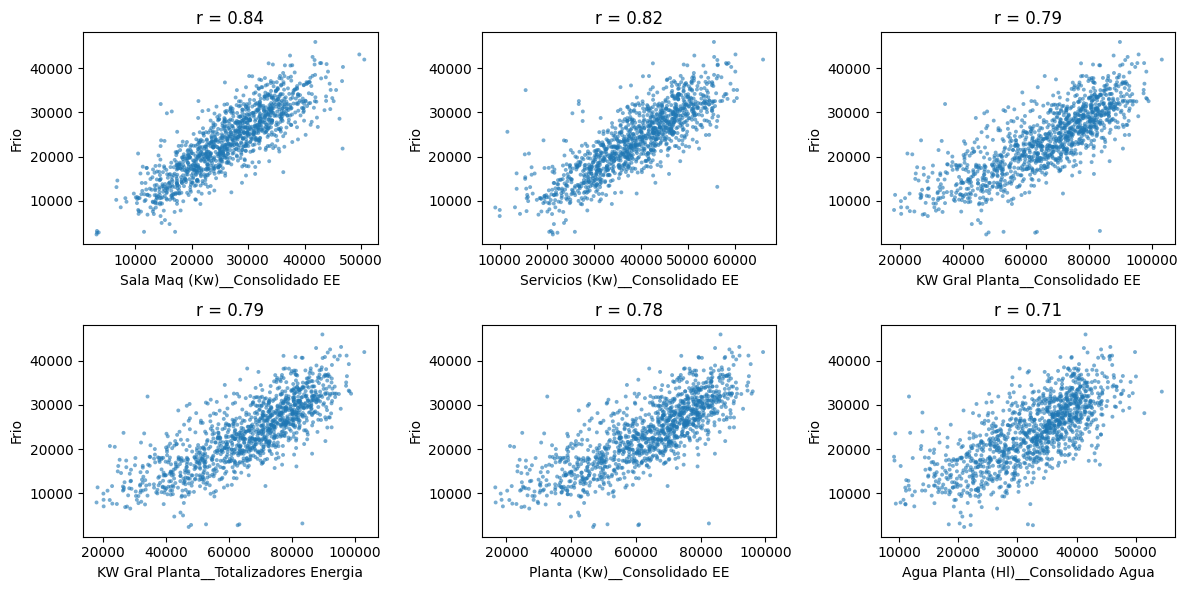

In [25]:
target = "Frio"
max_points = 5000  # ponelo en None para usar todos los puntos

# --- 1) Selección y ranking por correlación absoluta con "Frio" ---
num = df_imputado.select_dtypes("number").copy()
y = num[target].replace([np.inf, -np.inf], np.nan)

X = num.drop(columns=[target], errors="ignore").replace([np.inf, -np.inf], np.nan)

corrs = X.corrwith(y)                     # Pearson con signo
top5 = corrs.abs().sort_values(ascending=False).head(6).index.tolist()

print("Top 6 por |corr| con 'Frio':")
print(corrs.loc[top5].sort_values(key=np.abs, ascending=False))

# --- 2) Scatter plots en grilla 2x3 (5 plots + 1 vacío oculto) ---
rows, cols = 2, 3
fig, axes = plt.subplots(rows, cols, figsize=(cols*4, rows*3), squeeze=False)

for i, feat in enumerate(top5):
    ax = axes.flat[i]
    datos = pd.concat([X[feat], y], axis=1, keys=[feat, target]).dropna()
    if max_points is not None and len(datos) > max_points:
        datos = datos.sample(max_points, random_state=0)

    ax.scatter(datos[feat], datos[target], s=8, alpha=0.6, edgecolors="none")
    ax.set_xlabel(feat)
    ax.set_ylabel(target)
    ax.set_title(f"r = {corrs[feat]:.2f}")

# ocultar el subplot sobrante (si lo hay)
for j in range(len(top5), rows*cols):
    axes.flat[j].axis("off")

plt.tight_layout()
plt.show()

=== Consumo (asignación proxy) de Frio por área ===
              Frio_total  %_del_total
Servicios    17007231.51        59.34
Envasado      5415466.55        18.90
Elaboración   3911061.90        13.65
Bodega        1891734.80         6.60
Sala Maq       433900.42         1.51


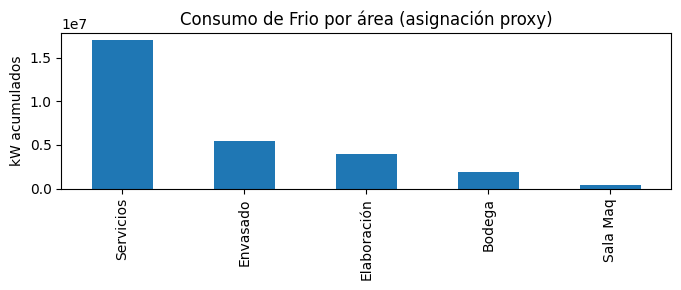

C:\Users\out6let\AppData\Local\Temp\ipykernel_11104\3151832933.py:51: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  area_frio.resample("M").sum().plot(figsize=(9,4), alpha=0.85)


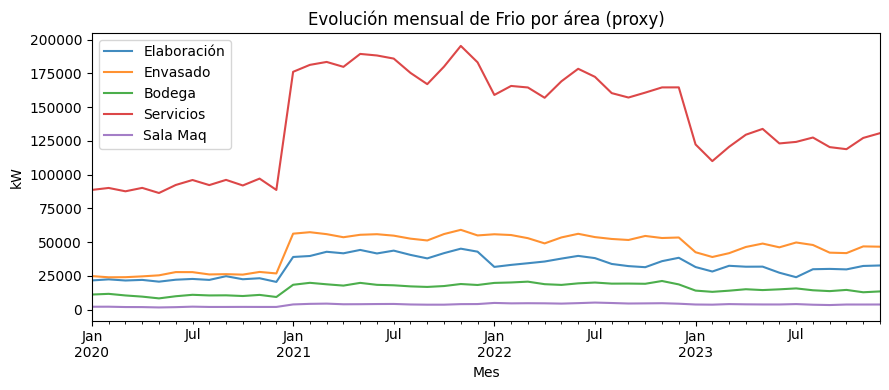

In [26]:
import re

# --- 0) Usar tu DF ya cargado ---
df = df_imputado.copy() 

# --- 1) Columna de Frio (elige la que tengas) ---
FRIO_CANDIDATAS = ["Frio (Kw)__Consolidado EE", "Frio"]
FRIO_COL = next((c for c in FRIO_CANDIDATAS if c in df.columns), None)
assert FRIO_COL is not None, "No encuentro la columna de 'Frio'."

# --- 2) Patrones por área (ajustá si hace falta) ---
AREAS = {
    "Elaboración": r"Elab|Elabor|Coci|Cocina|Mosto|Lauter|Macer|Paste",
    "Envasado":    r"Envas|Llen|Linea|L[2345]\b",
    "Bodega":      r"Bodega|Bodeg",
    "Servicios":   r"Servicios|Vapor|Gas|Agua|Aire|Caldera|Compres|Chiller|Sala",
    "Sala Maq":    r"Sala.*Maq",
}
# columnas a excluir del proxy (metas, columnas sin nombre, y ratios por Hl KPI)
EXC = r"^(Meta|Unnamed)|/ Hl_Consolidado KPI|^\s*_"

# --- 3) Construir un "proxy de actividad" por área (min-max simple) ---
num = df.select_dtypes("number").drop(columns=[FRIO_COL], errors="ignore")
cols_validas = [c for c in num.columns if not re.search(EXC, c, flags=re.I)]
norm = (num[cols_validas] - num[cols_validas].min()) / (num[cols_validas].max() - num[cols_validas].min())
norm = norm.replace([np.inf, -np.inf], np.nan)

cols_area = {area: [c for c in norm.columns if re.search(pat, c, flags=re.I)] for area, pat in AREAS.items()}
proxy = pd.DataFrame({area: norm[cols].sum(axis=1) if cols else 0.0 for area, cols in cols_area.items()}).fillna(0)

# --- 4) Repartir el Frio total según pesos (proxy normalizado por fila) ---
w = proxy.clip(lower=0)
w = w.div(w.sum(axis=1).replace(0, np.nan), axis=0).fillna(0)
area_frio = w.mul(df[FRIO_COL].values, axis=0)

# --- 5) Resumen y gráficos ---
resumen = area_frio.sum().to_frame("Frio_total")
resumen["%_del_total"] = 100 * resumen["Frio_total"] / resumen["Frio_total"].sum()
print("=== Consumo (asignación proxy) de Frio por área ===")
print(resumen.sort_values("Frio_total", ascending=False).round(2))

resumen["Frio_total"].sort_values(ascending=False).plot(kind="bar", figsize=(7,3))
plt.title("Consumo de Frio por área (asignación proxy)")
plt.ylabel("kW acumulados"); plt.xlabel("")
plt.tight_layout(); plt.show()

# Evolución mensual por área (si hay columna de fecha)
if "dia" in df.columns:
    idx = pd.to_datetime(df["dia"], errors="coerce", dayfirst=True)
    area_frio.index = idx
    area_frio.resample("M").sum().plot(figsize=(9,4), alpha=0.85)
    plt.title("Evolución mensual de Frio por área (proxy)")
    plt.ylabel("kW"); plt.xlabel("Mes")
    plt.tight_layout(); plt.show()